<a href="https://colab.research.google.com/github/Garden1107/infectious-disease/blob/main/%EA%B0%90%EC%97%BC%EB%B3%91%EB%8C%80%EC%9D%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 취약계층 파악

In [ ]:

import numpy as np
import pandas as pd


In [ ]:
#데이터 불러오기 취약계층의 나이대 확인용
covidage = pd.read_csv('/content/Covid19GenAgeCaseInf.csv', encoding = 'EUC-KR',index_col=['구분'])
covidage.head()

,고유값,확진자,확진률,사망자,사망률,치명률,등록일시분초,수정일시분초
구분,,,,,,,,
0-9,24986,3124756,10.07,37.0,0.11,0,2023-04-20 4:34,NaN
10-19,24985,3861327,12.44,23.0,0.07,0,2023-04-20 4:34,NaN
20-29,24984,4522818,14.57,80.0,0.23,0,2023-04-20 4:34,NaN
30-39,24983,4547212,14.65,160.0,0.47,0,2023-04-20 4:34,NaN
40-49,24982,4726618,15.23,469.0,1.36,0.01,2023-04-20 4:34,NaN


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#불필요 열 삭제
covidage.drop(['고유값','등록일시분초','수정일시분초'], axis=1, inplace=True)

In [ ]:
covidage.drop(['남성','여성'],inplace=True)

In [ ]:
covidage_total=covidage.groupby(['구분']).sum() #나이대로 모두 더함
covidage_total

<ipython-input-12-bb625bdd8c58>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covidage_total=covidage.groupby(['구분']).sum() #나이대로 모두 더함


,확진자,확진률,사망자,사망률
구분,,,,
0-11,1,1.00,1.0,1.00
0-9,1030908768,7224.19,11702.0,37.41
10-19,1201890568,9971.32,5836.0,17.20
20-29,1386550022,18461.66,29021.0,158.37
30-39,1382305225,14662.81,57896.0,523.87
40-49,1444110278,15581.54,161307.0,1199.40
50-59,1204641574,16408.98,507466.0,4712.28
60-69,995696703,13174.59,1441012.0,13286.71
70-79,491285702,6296.00,2846469.0,28003.04


In [ ]:
covidage_total.sort_values(['사망률'],ascending=False)
#80대 이상이 가장 감염 시 가장 위험하며 그 이후로 나이가 많은 노인, 중장년층 순으로 위험하다. 취약계층 확인

,확진자,확진률,사망자,사망률
구분,,,,
80 이상,295964304,3755.66,7080953.0,57295.01
70-79,491285702,6296.00,2846469.0,28003.04
60-69,995696703,13174.59,1441012.0,13286.71
50-59,1204641574,16408.98,507466.0,4712.28
40-49,1444110278,15581.54,161307.0,1199.40
30-39,1382305225,14662.81,57896.0,523.87
20-29,1386550022,18461.66,29021.0,158.37
0-9,1030908768,7224.19,11702.0,37.41
10-19,1201890568,9971.32,5836.0,17.20


### 시도별 코로나 사망자 많은지역 파악



In [ ]:
covid_local=pd.read_csv('/content/Covid19SidoInfState.csv',encoding = 'EUC-KR',index_col=['시도명(한글)'])
covid_local

,고유값,기준일시,시도명(중국어),시도명(영어),사망자 수,전일대비 증감 수,격리해제 수,10만명당 발생률,확진자 수,격리중 환자 수,해외유입 수,지역발생 수,등록일시분초,수정일시분초
시도명(한글),,,,,,,,,,,,,,
검역,23911,2023년 04월 20일 00시,隔離區,Lazaretto,16.0,9.0,NaN,-,17893.0,NaN,9.0,0.0,2023-04-20 4:32,NaN
제주,23910,2023년 04월 20일 00시,?州,Jeju,274.0,169.0,NaN,58097,393987.0,NaN,0.0,169.0,2023-04-20 4:32,NaN
경남,23909,2023년 04월 20일 00시,?南,Gyeongsangnam-do,1960.0,485.0,NaN,56516,1853993.0,NaN,0.0,485.0,2023-04-20 4:32,NaN
경북,23908,2023년 04월 20일 00시,?北,Gyeongsangbuk-do,2097.0,471.0,NaN,54642,1420954.0,NaN,1.0,470.0,2023-04-20 4:32,NaN
전남,23907,2023년 04월 20일 00시,全南,Jeollanam-do,995.0,453.0,NaN,55843,1015055.0,NaN,0.0,453.0,2023-04-20 4:32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천,5,2020년 3월 1일 16시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27,NaN
대구,4,2020년 3월 1일 16시,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27,NaN
부산,3,2020년 3월 1일 16시,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27,NaN


In [ ]:
covid_local.drop(['시도명(중국어)','시도명(영어)','등록일시분초','수정일시분초','고유값','기준일시'], axis=1, inplace=True)

In [ ]:
covid_local_total=covid_local.groupby(['시도명(한글)']).sum()
covid_local_total

<ipython-input-16-64e7d06652f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_local_total=covid_local.groupby(['시도명(한글)']).sum()


,사망자 수,전일대비 증감 수,격리해제 수,확진자 수,격리중 환자 수,해외유입 수,지역발생 수
시도명(한글),,,,,,,
강원,428540.0,956866.0,2396627.0,2.735273e+08,109894.0,22906.0,934213.0
검역,10702.0,18585.0,2239331.0,8.245654e+06,206292.0,19342.0,86.0
경기,3191482.0,8793035.0,31208744.0,2.576276e+09,1984124.0,195115.0,8601037.0
경남,596294.0,1956567.0,4007070.0,5.641302e+08,181945.0,50490.0,1906703.0
경북,704210.0,1485164.0,3415657.0,4.193617e+08,148469.0,37484.0,1454065.0
광주,272180.0,948383.0,1883260.0,2.747155e+08,74439.0,19974.0,928582.0
대구,796460.0,1412649.0,7961304.0,4.104958e+08,265358.0,54304.0,1391301.0
대전,332219.0,946248.0,2125718.0,2.711038e+08,125620.0,20561.0,925933.0
부산,1018520.0,1924137.0,4552883.0,5.679822e+08,207377.0,43223.0,1881673.0


In [ ]:
covid_local_div=covid_local_total['사망자 수'].div(covid_local_total['확진자 수'],fill_value=None)
covid_local_div.sort_values(ascending=False)

#코로나 확진자 당 사망률이 높은 지역 대구 부산 경북 순

시도명(한글)
대구    0.001940
부산    0.001793
경북    0.001679
강원    0.001567
전북    0.001341
충남    0.001330
서울    0.001329
합계    0.001303
검역    0.001298
충북    0.001244
경기    0.001239
대전    0.001225
인천    0.001200
경남    0.001057
광주    0.000991
울산    0.000918
전남    0.000878
제주    0.000689
세종    0.000242
dtype: float64

###  감염병상 부족 지역 파악

In [ ]:

hospital_bed=pd.read_excel('/content/시설및장비현황_지역별종별_입원실현황_2023년3분기.xlsx',skiprows=[0,1,2],header=[1],index_col='시도')
hospital_bed.head()

,요양기관종별,병실수,병상수,일반입원실(상급)병실수,일반입원실(상급)병상수,일반입원실(일반)병실수,일반입원실(일반)병상수,일반입원실외국인전용병실수,일반입원실외국인전용병상수,중환자실_신생아병실수,중환자실_신생아병상수,중환자실_성인병실수,중환자실_성인병상수,중환자실_소아병실수,중환자실_소아병상수,격리병실병실수,격리병실병상수,무균치료실병실수,무균치료실병상수
시도,,,,,,,,,,,,,,,,,,,
서울,상급종합병원,5487,17708,1358.0,1358.0,3704.0,14178.0,NaN,NaN,27.0,425.0,79.0,1178.0,6.0,94.0,198.0,273.0,115.0,202.0
서울,종합병원,4314,15440,757.0,757.0,3201.0,13214.0,14.0,100.0,21.0,159.0,132.0,919.0,NaN,NaN,159.0,255.0,30.0,36.0
서울,병원,5337,17096,1194.0,1194.0,4060.0,15606.0,NaN,NaN,NaN,NaN,6.0,47.0,NaN,NaN,77.0,249.0,NaN,NaN
서울,요양병원,4572,21116,984.0,1632.0,3485.0,19036.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,448.0,NaN,NaN
서울,정신병원,40,102,NaN,NaN,15.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,43.0,NaN,NaN


In [ ]:
hospital_isolation_bed=hospital_bed[['격리병실병실수','격리병실병상수']] #필요한 격리병상수만 추출
hospital_isolation_bed.head()

,격리병실병실수,격리병실병상수
시도,,
서울,198.0,273.0
서울,159.0,255.0
서울,77.0,249.0
서울,103.0,448.0
서울,25.0,43.0


In [ ]:
isolation_bed_total=hospital_isolation_bed.groupby(['시도'],observed=False).sum().fillna(0)
isolation_bed_total #지역별 격리병상 수 구함

,격리병실병실수,격리병실병상수
시도,,
강원,87.0,199.0
경기,490.0,1047.0
경남,191.0,344.0
경북,116.0,203.0
광주,116.0,168.0
대구,120.0,348.0
대전,53.0,69.0
부산,202.0,376.0
서울,562.0,1268.0


In [ ]:
isolation_bed_local_rate=isolation_bed_total['격리병실병상수'].div(covid_local_total['확진자 수'],fill_value=None)
isolation_bed_local_rate.sort_values(ascending=True) #지역별 격리병상수에서
#두 번째 csv파일인 /content/Covid19SidoInfState.csv 에서의 지역별 확진자 수로 나눔
#그리고 오름차순 정렬
#결론: 확진자 수에 비해 격리병상이 적은 지역은 세종, 대전, 울산 순이다.

세종    9.563064e-08
대전    2.545150e-07
울산    3.094600e-07
경기    4.064006e-07
경북    4.840690e-07
경남    6.097883e-07
광주    6.115418e-07
전남    6.232523e-07
부산    6.619925e-07
서울    6.705242e-07
제주    6.792367e-07
인천    7.205405e-07
강원    7.275326e-07
대구    8.477553e-07
충북    8.637412e-07
충남    8.707572e-07
전북    2.413368e-06
검역             NaN
합계             NaN
dtype: float64

지역별 연령대


In [ ]:
localage=pd.read_csv('/content/연령_및_성별_인구__시군구_20231102224918.csv', encoding='EUC-KR', header=[1])
localage.head()

,행정구역별(시군구),연령별,인구(내국인) (명),남자 (명),여자 (명),성비
0,전국,합계,49855796.0,24881520,24974276.0,99.6
1,전국,0~4세,2192603.0,1124012,1068591.0,105.2
2,전국,5~9세,2287123.0,1177879,1109244.0,106.2
3,전국,10~14세,2288612.0,1188475,1100137.0,108
4,전국,15~19세,3056728.0,1594229,1462499.0,109


In [ ]:
localage.rename(columns={"행정구역별(시군구)":"시군구","인구(내국인) (명)":"인구",
                "남자 (명)": "남자", "여자 (명)":"여자"}, inplace =True)

localage.columns



Index(['시군구', '연령별', '인구', '남자', '여자', '성비'], dtype='object')

In [ ]:
전체인구=localage[localage['연령별']=='합계']
전체인구.reset_index(drop=True, inplace=True)
전체인구.rename(columns={'인구':'합계인구'}, inplace=True)


<ipython-input-24-34c916bd9500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  전체인구.rename(columns={'인구':'합계인구'}, inplace=True)


In [ ]:
취약계층인구=localage[localage['연령별']=='65세이상']
취약계층인구.reset_index(drop=True, inplace=True)
취약계층인구.rename(columns={'인구':'취약층인구'}, inplace=True)

<ipython-input-25-d1d5bfe0e906>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  취약계층인구.rename(columns={'인구':'취약층인구'}, inplace=True)


In [ ]:
data=pd.concat([전체인구, 취약계층인구], axis=1)
data['지역별노인비율']=data['취약층인구']/data['합계인구']
취약층비율=data[['시군구','지역별노인비율']]
취약층비율.sort_values(['지역별노인비율'],ascending=False)

,시군구,시군구,지역별노인비율
2,면부,면부,0.280502
17,전라남도,전라남도,0.213378
16,전라북도,전라북도,0.183808
18,경상북도,경상북도,0.182317
13,강원도,강원도,0.171506
15,충청남도,충청남도,0.164849
5,부산광역시,부산광역시,0.153961
14,충청북도,충청북도,0.150229
1,읍부,읍부,0.149670
19,경상남도,경상남도,0.143341


## 세종

In [ ]:

세종=localage[localage['시군구']=='세종특별자치시']


In [ ]:
세종.sort_values(['인구'])
세종.reset_index(drop=True, inplace=True)
세종.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
세종

<ipython-input-28-68ac8d55f521>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  세종.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)


,시군구,연령별,인구,남자,여자,성비
1,세종특별자치시,0~4세,16658.0,8592,8066.0,106.5
2,세종특별자치시,5~9세,17094.0,8585,8509.0,100.9
3,세종특별자치시,10~14세,14104.0,7099,7005.0,101.3
4,세종특별자치시,15~19세,13955.0,7100,6855.0,103.6
5,세종특별자치시,20~24세,16686.0,9137,7549.0,121
6,세종특별자치시,25~29세,13914.0,7374,6540.0,112.8
7,세종특별자치시,30~34세,19155.0,9278,9877.0,93.9
8,세종특별자치시,35~39세,24347.0,11940,12407.0,96.2
9,세종특별자치시,40~44세,22851.0,11925,10926.0,109.1
10,세종특별자치시,45~49세,18501.0,10045,8456.0,118.8


In [ ]:
세종.replace({'0~4세':'0~9세',
            '5~9세':'0~9세',
            '10~14세':'10~19세',
            '15~19세':'10~19세',
            '20~24세':'20~29세',
            '25~29세':'20~29세',
            '30~34세':'30~39세',
            '35~39세':'30~39세',
            '40~44세':'40~49세',
            '45~49세':'40~49세',
            '50~54세':'50~59세',
            '55~59세':'50~59세',
            '60~64세':'60~69세',
            '65~69세':'60~69세',
            '70~74세':'70~79세',
            '75~79세':'70~79세',
            '80~84세':'80~89세',
            '85~89세':'80~89세',
            '95~99세':'90~99세',
            '90~94세':'90~99세'}, inplace=True)

<ipython-input-29-c2603afb1cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  세종.replace({'0~4세':'0~9세',


In [ ]:
세종연령별 = 세종.groupby('연령별').sum()
세종연령별

<ipython-input-30-baa675fd3e97>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  세종연령별 = 세종.groupby('연령별').sum()


,인구,여자
연령별,,
0~9세,33752.0,16575.0
100세이상,21.0,21.0
10~19세,28059.0,13860.0
20~29세,30600.0,14089.0
30~39세,43502.0,22284.0
40~49세,41352.0,19382.0
50~59세,27468.0,13305.0
60~69세,17157.0,8784.0
70~79세,10377.0,5910.0


In [ ]:
a=세종연령별['인구'].sum()
a

237672.0

In [ ]:
세종연령별['세종인구비율']=세종연령별['인구']/a

In [ ]:

세종연령별

,인구,여자,세종인구비율
연령별,,,
0~9세,33752.0,16575.0,0.142011
100세이상,21.0,21.0,0.000088
10~19세,28059.0,13860.0,0.118058
20~29세,30600.0,14089.0,0.128749
30~39세,43502.0,22284.0,0.183034
40~49세,41352.0,19382.0,0.173988
50~59세,27468.0,13305.0,0.115571
60~69세,17157.0,8784.0,0.072188
70~79세,10377.0,5910.0,0.043661


## 울산

In [ ]:
울산=localage[localage['시군구']=='울산광역시']
울산.sort_values(['인구'])
울산.reset_index(drop=True, inplace=True)
울산.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
울산

<ipython-input-34-2fc89813e6cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  울산.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)


,시군구,연령별,인구,남자,여자,성비
1,울산광역시,0~4세,57642.0,29570,28072.0,105.3
2,울산광역시,5~9세,57376.0,29846,27530.0,108.4
3,울산광역시,10~14세,55009.0,28969,26040.0,111.2
4,울산광역시,15~19세,72705.0,39585,33120.0,119.5
5,울산광역시,20~24세,75870.0,44631,31239.0,142.9
6,울산광역시,25~29세,71351.0,40031,31320.0,127.8
7,울산광역시,30~34세,81222.0,43031,38191.0,112.7
8,울산광역시,35~39세,93186.0,48820,44366.0,110
9,울산광역시,40~44세,93265.0,46866,46399.0,101
10,울산광역시,45~49세,108245.0,53344,54901.0,97.2


In [ ]:
울산.replace({'0~4세':'0~9세',
            '5~9세':'0~9세',
            '10~14세':'10~19세',
            '15~19세':'10~19세',
            '20~24세':'20~29세',
            '25~29세':'20~29세',
            '30~34세':'30~39세',
            '35~39세':'30~39세',
            '40~44세':'40~49세',
            '45~49세':'40~49세',
            '50~54세':'50~59세',
            '55~59세':'50~59세',
            '60~64세':'60~69세',
            '65~69세':'60~69세',
            '70~74세':'70~79세',
            '75~79세':'70~79세',
            '80~84세':'80~89세',
            '85~89세':'80~89세',
            '95~99세':'90~99세',
            '90~94세':'90~99세'}, inplace=True)

<ipython-input-35-bf95ba716dba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  울산.replace({'0~4세':'0~9세',


In [ ]:
울산연령별 = 울산.groupby('연령별').sum()
울산연령별

<ipython-input-36-fdcf61517a64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  울산연령별 = 울산.groupby('연령별').sum()


,인구,여자
연령별,,
0~9세,115018.0,55602.0
100세이상,34.0,32.0
10~19세,127714.0,59160.0
20~29세,147221.0,62559.0
30~39세,174408.0,82557.0
40~49세,201510.0,101300.0
50~59세,200175.0,96870.0
60~69세,105803.0,51998.0
70~79세,46438.0,25889.0


In [ ]:
b=울산연령별['인구'].sum()
울산연령별['울산인구비율']=울산연령별['인구']/b
울산연령별

,인구,여자,울산인구비율
연령별,,,
0~9세,115018.0,55602.0,0.101138
100세이상,34.0,32.0,0.000030
10~19세,127714.0,59160.0,0.112302
20~29세,147221.0,62559.0,0.129455
30~39세,174408.0,82557.0,0.153361
40~49세,201510.0,101300.0,0.177192
50~59세,200175.0,96870.0,0.176018
60~69세,105803.0,51998.0,0.093035
70~79세,46438.0,25889.0,0.040834


## 대전

In [ ]:
대전=localage[localage['시군구']=='대전광역시']
대전.sort_values(['인구'])
대전.reset_index(drop=True, inplace=True)
대전.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
대전.replace({'0~4세':'0~9세',
            '5~9세':'0~9세',
            '10~14세':'10~19세',
            '15~19세':'10~19세',
            '20~24세':'20~29세',
            '25~29세':'20~29세',
            '30~34세':'30~39세',
            '35~39세':'30~39세',
            '40~44세':'40~49세',
            '45~49세':'40~49세',
            '50~54세':'50~59세',
            '55~59세':'50~59세',
            '60~64세':'60~69세',
            '65~69세':'60~69세',
            '70~74세':'70~79세',
            '75~79세':'70~79세',
            '80~84세':'80~89세',
            '85~89세':'80~89세',
            '95~99세':'90~99세',
            '90~94세':'90~99세'}, inplace=True)
대전연령별 = 대전.groupby('연령별').sum()
c=대전연령별['인구'].sum()
대전연령별['대전인구비율']=대전연령별['인구']/c
대전연령별


<ipython-input-38-16c0e8738930>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대전.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
<ipython-input-38-16c0e8738930>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대전.replace({'0~4세':'0~9세',
<ipython-input-38-16c0e8738930>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  대전연령별 = 대전.groupby('연령별').sum()


,인구,여자,대전인구비율
연령별,,,
0~9세,140694.0,68165.0,0.092821
100세이상,113.0,98.0,0.000075
10~19세,180615.0,86315.0,0.119158
20~29세,226841.0,104059.0,0.149655
30~39세,219687.0,107988.0,0.144935
40~49세,257962.0,129509.0,0.170187
50~59세,235338.0,117899.0,0.155261
60~69세,141437.0,72175.0,0.093311
70~79세,77467.0,43315.0,0.051108


## 비교

In [ ]:
연령비율=pd.concat([세종연령별,대전연령별,울산연령별], axis=1)
연령비율비교=연령비율[['세종인구비율','대전인구비율','울산인구비율']]
연령비율비교

,세종인구비율,대전인구비율,울산인구비율
연령별,,,
0~9세,0.142011,0.092821,0.101138
100세이상,0.000088,0.000075,0.000030
10~19세,0.118058,0.119158,0.112302
20~29세,0.128749,0.149655,0.129455
30~39세,0.183034,0.144935,0.153361
40~49세,0.173988,0.170187,0.177192
50~59세,0.115571,0.155261,0.176018
60~69세,0.072188,0.093311,0.093035
70~79세,0.043661,0.051108,0.040834


In [ ]:
노인연령비율=연령비율비교.iloc[[1,8,9,10]]
노인합비율=노인연령비율.sum()
노인합비율

세종인구비율    0.066402
대전인구비율    0.074672
울산인구비율    0.057501
dtype: float64

###  노인(70세 이상) 비율은 대전>세종>울산 이다

# 취약연령층 시각화

In [ ]:
!pip install koreanize-matplotlib   #그래프 한글폰트깨짐 문제해결
import koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-42-56f1da6acbd8>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covidage_total=covidage.groupby(['구분']).sum() #나이대로 모두 더함


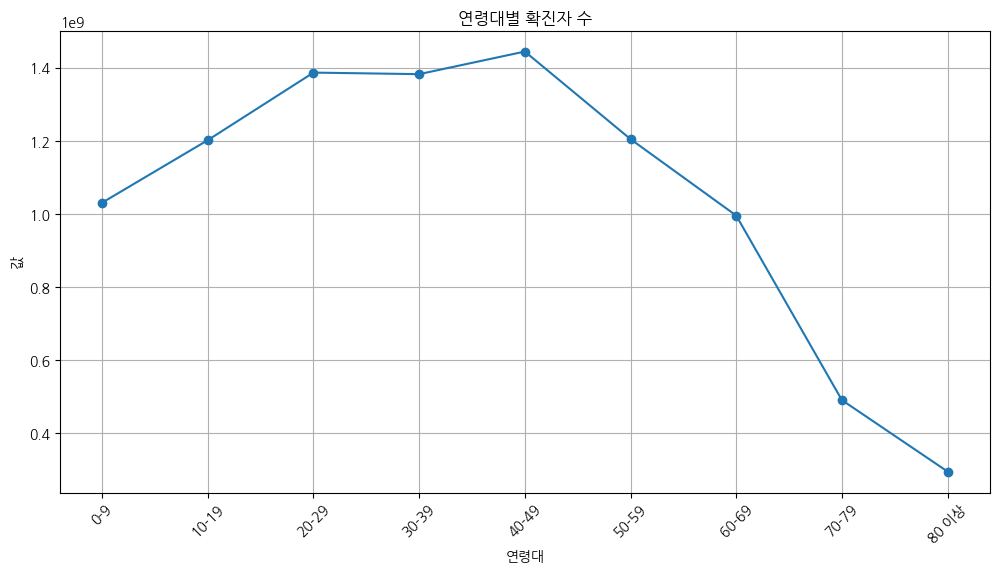

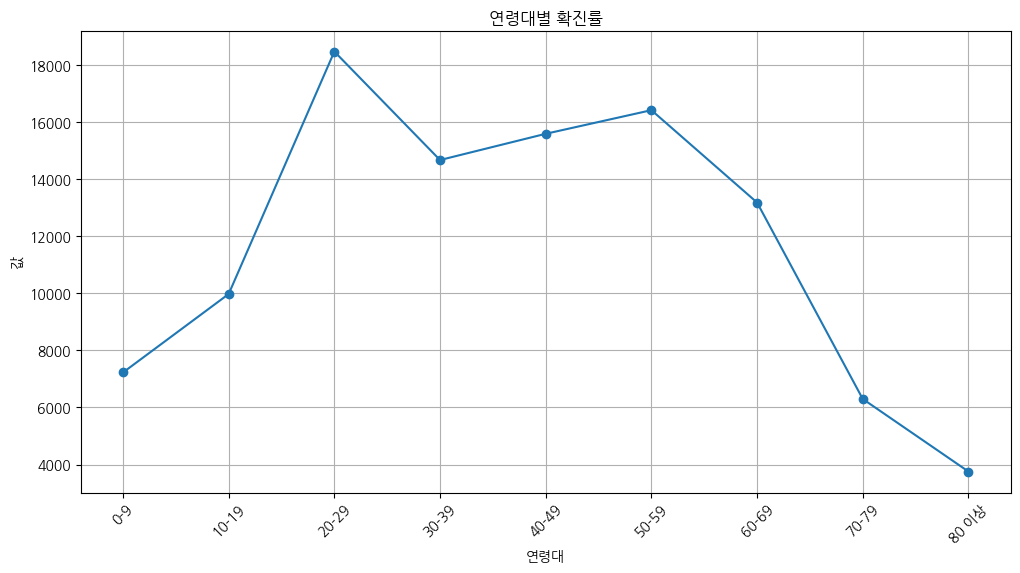

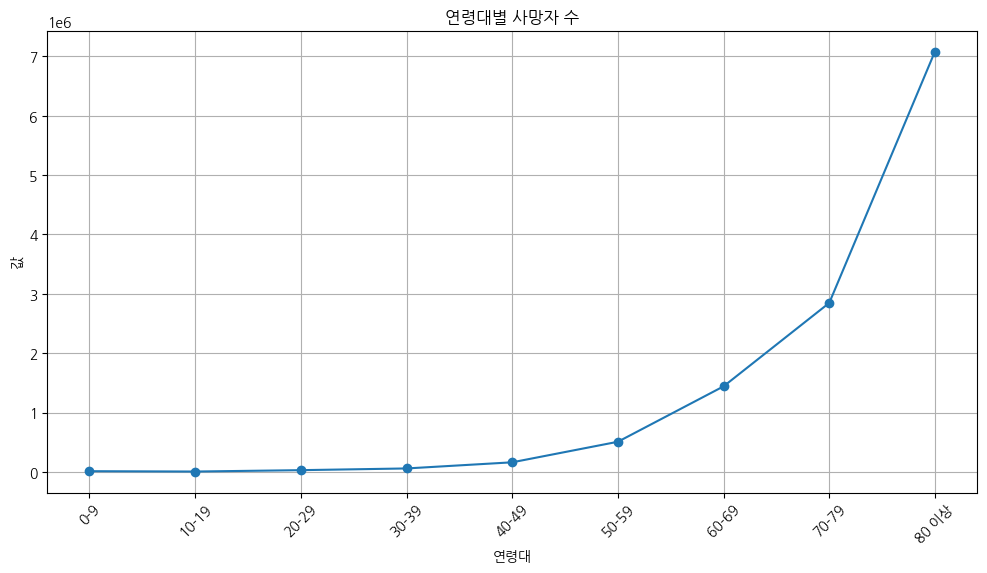

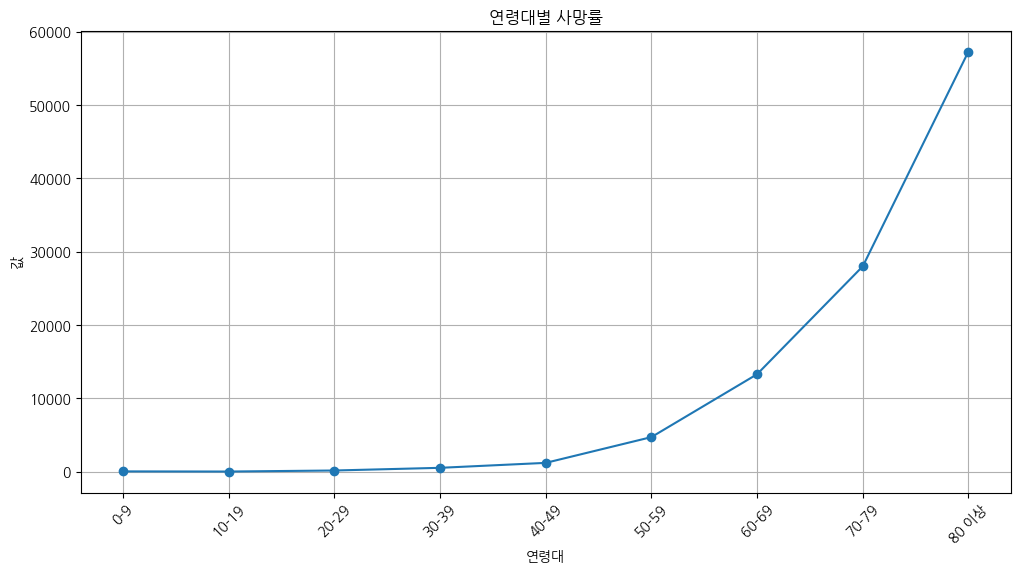

In [ ]:
covidage = pd.read_csv('/content/Covid19GenAgeCaseInf.csv', encoding = 'EUC-KR',index_col=['구분'])
covidage.head(5)


from google.colab import drive
drive.mount('/content/drive')

covidage.drop(['고유값','등록일시분초','수정일시분초'], axis=1, inplace=True)
covidage.drop(['남성','여성','0-11'],inplace=True)
covidage_total=covidage.groupby(['구분']).sum() #나이대로 모두 더함
covidage_total
covidage_total.sort_values(['구분'],ascending=False)

def plot_age_data(data, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    data.plot(ax=ax, marker='o', linestyle='-', legend=False)
    ax.set_title(title)
    ax.set_xlabel('연령대')
    ax.set_ylabel('값')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# 확진자 데이터 선 그래프
plot_age_data(covidage_total['확진자'], '연령대별 확진자 수')

# 확진률 데이터 선 그래프
plot_age_data(covidage_total['확진률'], '연령대별 확진률')

# 사망자 데이터 선 그래프
plot_age_data(covidage_total['사망자'], '연령대별 사망자 수')

# 사망률 데이터 선 그래프
plot_age_data(covidage_total['사망률'], '연령대별 사망률')




# 사망자 많은 지역(지역사망율)

In [ ]:
!pip install koreanize-matplotlib   #그래프 한글폰트깨짐 문제해결
import koreanize_matplotlib

<ipython-input-44-eb37c624bea8>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_local_total = covid_local.groupby(['시도명(한글)']).sum()


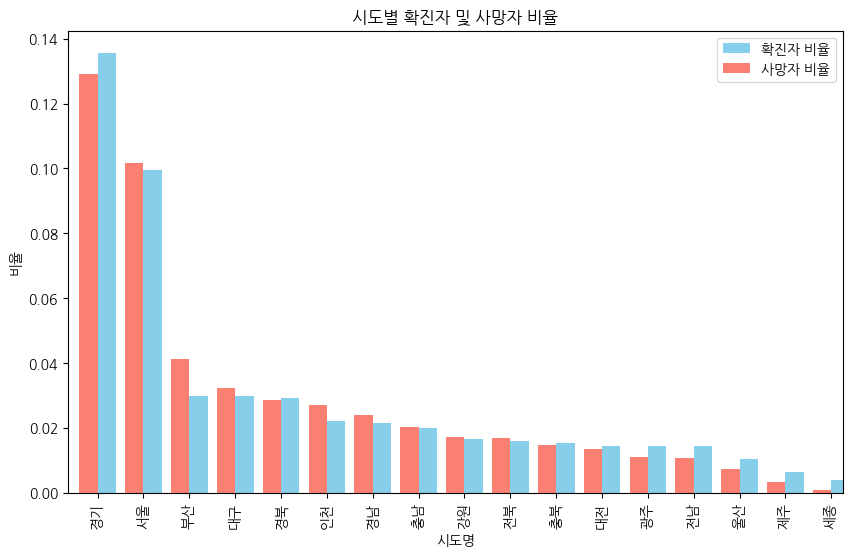

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
covid_local = pd.read_csv('/content/Covid19SidoInfState.csv', encoding='EUC-KR', index_col=['시도명(한글)'])
covid_local.drop(['시도명(중국어)', '시도명(영어)', '등록일시분초', '수정일시분초', '고유값', '기준일시'], axis=1, inplace=True)
covid_local_total = covid_local.groupby(['시도명(한글)']).sum()

# 확진자와 사망자 비율 계산
covid_local_total['확진자 비율'] = covid_local_total['확진자 수'] / covid_local_total['확진자 수'].sum()
covid_local_total['사망자 비율'] = covid_local_total['사망자 수'] / covid_local_total['사망자 수'].sum()

# 합계 제거
covid_local_total = covid_local_total[covid_local_total.index != '합계']
covid_local_total = covid_local_total[covid_local_total.index != '검역']
# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 확진자 비율 막대그래프
covid_local_total['확진자 비율'].sort_values(ascending=False).plot(kind='bar', position=0, width=0.4, color='skyblue', ax=ax, label='확진자 비율')

# 사망자 비율 막대그래프
covid_local_total['사망자 비율'].sort_values(ascending=False).plot(kind='bar', position=1, width=0.4, color='salmon', ax=ax, label='사망자 비율')

# 그래프 설정
ax.set_xlabel('시도명')
ax.set_ylabel('비율')
ax.set_title('시도별 확진자 및 사망자 비율')
ax.legend()

# 그래프 출력
plt.show()


# 감염병상 부족지역 시각화

In [ ]:
hospital_bed=pd.read_excel('/content/시설및장비현황_지역별종별_입원실현황_2023년3분기.xlsx',skiprows=[0,1,2],header=[1],index_col='시도')
hospital_bed.head()
hospital_isolation_bed=hospital_bed[['격리병실병실수','격리병실병상수']] #필요한 격리병상수만 추출
hospital_isolation_bed.head()
isolation_bed_total=hospital_isolation_bed.groupby(['시도'],observed=False).sum().fillna(0)
isolation_bed_total #지역별 격리병상 수 구함
isolation_bed_local_rate=isolation_bed_total['격리병실병상수'].div(covid_local_total['확진자 수'],fill_value=None)
isolation_bed_local_rate.sort_values(ascending=True)

시도
세종    9.563064e-08
대전    2.545150e-07
울산    3.094600e-07
경기    4.064006e-07
경북    4.840690e-07
경남    6.097883e-07
광주    6.115418e-07
전남    6.232523e-07
부산    6.619925e-07
서울    6.705242e-07
제주    6.792367e-07
인천    7.205405e-07
강원    7.275326e-07
대구    8.477553e-07
충북    8.637412e-07
충남    8.707572e-07
전북    2.413368e-06
dtype: float64

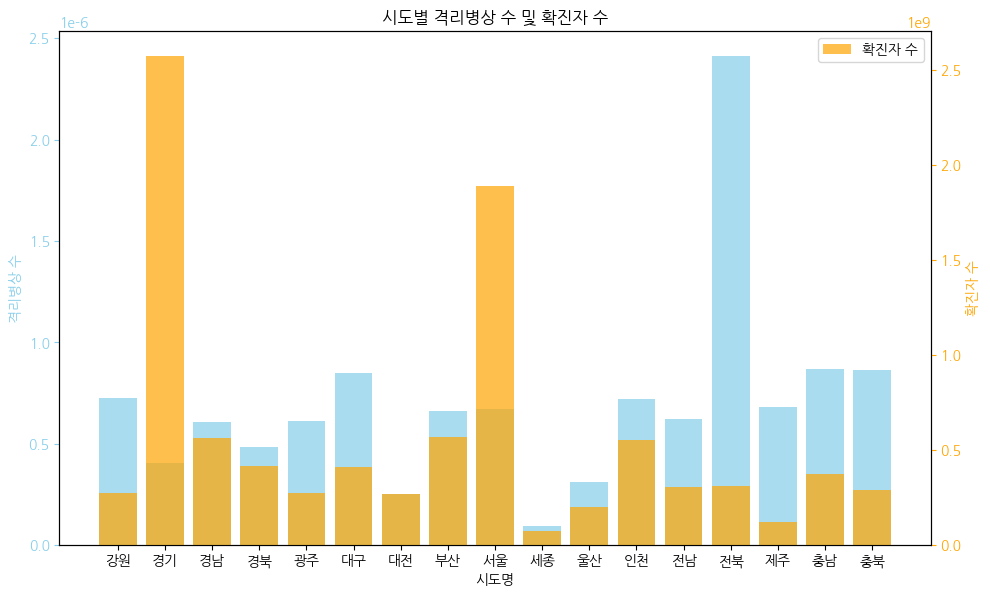

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# COVID-19 데이터 불러오기 (이전 코드에서 이미 수행했다고 가정)
# covid_local = pd.read_csv('/content/Covid19SidoInfState.csv', encoding='EUC-KR', index_col='시도명(한글)')

# 입원실 현황 데이터 불러오기
hospital_bed = pd.read_excel('/content/시설및장비현황_지역별종별_입원실현황_2023년3분기.xlsx', skiprows=[0, 1, 2], header=[1], index_col='시도')

# 필요한 격리병상수만 추출
hospital_isolation_bed = hospital_bed[['격리병실병실수', '격리병실병상수']]

# 지역별 격리병상 수 구하기
isolation_bed_total = hospital_isolation_bed.groupby(['시도'], observed=False).sum().fillna(0)

# 지역별 확진자 수 구하기 (이전 코드에서 이미 수행했다고 가정)
# covid_local_total = covid_local.groupby(['시도명(한글)']).sum()

# 지역별 격리병상 수
isolation_bed_local_rate = isolation_bed_total['격리병실병상수'].div(covid_local_total['확진자 수'], fill_value=None)

# 격리병상 수 대 확진자 수 비율 막대그래프 겹쳐 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 격리병상 수
ax1.bar(isolation_bed_local_rate.index, isolation_bed_local_rate, color='skyblue', label='격리병상 수', alpha=0.7)
ax1.set_xlabel('시도명')
ax1.set_ylabel('격리병상 수', color='skyblue')
ax1.tick_params('y', colors='skyblue')

# 확진자 수 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.bar(covid_local_total.index, covid_local_total['확진자 수'], color='orange', label='확진자 수', alpha=0.7)
ax2.set_ylabel('확진자 수', color='orange')
ax2.tick_params('y', colors='orange')

# 그래프 설정
fig.tight_layout()
plt.title('시도별 격리병상 수 및 확진자 수')
plt.legend()
plt.show()


#거주 인구 연령분석 시각화

<ipython-input-47-161bc86845ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  전체인구.rename(columns={'인구':'합계인구'}, inplace=True)
<ipython-input-47-161bc86845ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  취약계층인구.rename(columns={'인구':'취약층인구'}, inplace=True)
<ipython-input-47-161bc86845ee>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  세종.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
<ipython-input-47-161bc86845ee>:22

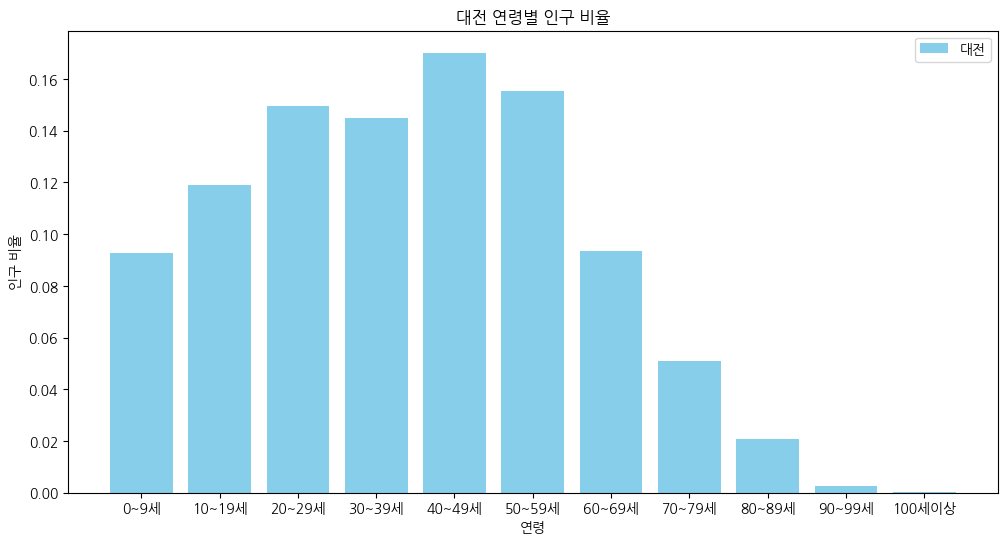

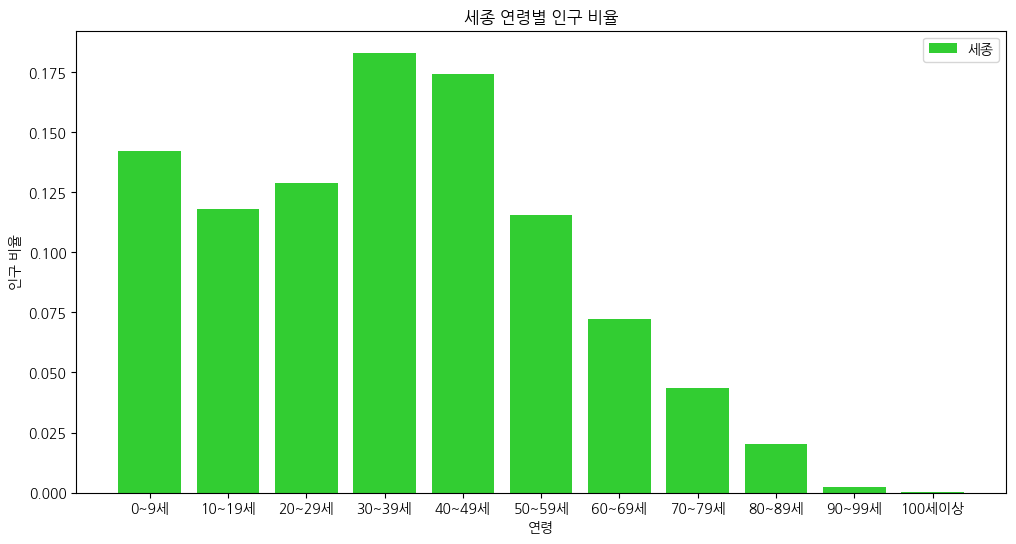

In [ ]:
localage=pd.read_csv('/content/연령_및_성별_인구__시군구_20231102224918.csv', encoding='EUC-KR', header=[1])
localage.head()
localage.rename(columns={"행정구역별(시군구)":"시군구","인구(내국인) (명)":"인구",
                "남자 (명)": "남자", "여자 (명)":"여자"}, inplace =True)

localage.columns
전체인구=localage[localage['연령별']=='합계']
전체인구.reset_index(drop=True, inplace=True)
전체인구.rename(columns={'인구':'합계인구'}, inplace=True)
취약계층인구=localage[localage['연령별']=='65세이상']
취약계층인구.reset_index(drop=True, inplace=True)
취약계층인구.rename(columns={'인구':'취약층인구'}, inplace=True)
data=pd.concat([전체인구, 취약계층인구], axis=1)
data['지역별노인비율']=data['취약층인구']/data['합계인구']
취약층비율=data[['시군구','지역별노인비율']]
취약층비율.sort_values(['지역별노인비율'],ascending=False)

세종=localage[localage['시군구']=='세종특별자치시']
세종.sort_values(['인구'])
세종.reset_index(drop=True, inplace=True)
세종.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
세종.replace({'0~4세':'0~9세',
            '5~9세':'0~9세',
            '10~14세':'10~19세',
            '15~19세':'10~19세',
            '20~24세':'20~29세',
            '25~29세':'20~29세',
            '30~34세':'30~39세',
            '35~39세':'30~39세',
            '40~44세':'40~49세',
            '45~49세':'40~49세',
            '50~54세':'50~59세',
            '55~59세':'50~59세',
            '60~64세':'60~69세',
            '65~69세':'60~69세',
            '70~74세':'70~79세',
            '75~79세':'70~79세',
            '80~84세':'80~89세',
            '85~89세':'80~89세',
            '95~99세':'90~99세',
            '90~94세':'90~99세'}, inplace=True)
세종연령별 = 세종.groupby('연령별').sum()
a=세종연령별['인구'].sum()
세종연령별['세종인구비율']=세종연령별['인구']/a

대전=localage[localage['시군구']=='대전광역시']
대전.sort_values(['인구'])
대전.reset_index(drop=True, inplace=True)
대전.drop(index=[0,18,23,24,25,26,27], axis=0, inplace=True)
대전.replace({'0~4세':'0~9세',
            '5~9세':'0~9세',
            '10~14세':'10~19세',
            '15~19세':'10~19세',
            '20~24세':'20~29세',
            '25~29세':'20~29세',
            '30~34세':'30~39세',
            '35~39세':'30~39세',
            '40~44세':'40~49세',
            '45~49세':'40~49세',
            '50~54세':'50~59세',
            '55~59세':'50~59세',
            '60~64세':'60~69세',
            '65~69세':'60~69세',
            '70~74세':'70~79세',
            '75~79세':'70~79세',
            '80~84세':'80~89세',
            '85~89세':'80~89세',
            '95~99세':'90~99세',
            '90~94세':'90~99세'}, inplace=True)
대전연령별 = 대전.groupby('연령별').sum()
c=대전연령별['인구'].sum()
대전연령별['대전인구비율']=대전연령별['인구']/c

연령비율=pd.concat([세종연령별,대전연령별], axis=1)
연령비율비교=연령비율[['세종인구비율','대전인구비율']]
연령비율비교

import matplotlib.pyplot as plt

# 대전 연령별 인구 비율 막대그래프
plt.figure(figsize=(12, 6))
대전연령별_copy = 대전연령별.copy()  # 원본 데이터 복사
hundred_plus_daejeon = 대전연령별_copy.loc['100세이상']  # '100세이상' 행 저장
대전연령별_copy.drop('100세이상', inplace=True)  # '100세이상' 행 삭제
스카이블루 = '#87CEEB'  # 스카이 블루
plt.bar(대전연령별_copy.index, 대전연령별_copy['대전인구비율'], color=스카이블루, label='대전')  # 스카이 블루
plt.bar('100세이상', hundred_plus_daejeon['대전인구비율'], color=스카이블루)  # 스카이 블루
plt.xlabel('연령')
plt.ylabel('인구 비율')
plt.title('대전 연령별 인구 비율')
plt.legend()
plt.show()

# 세종 연령별 인구 비율 막대그래프
plt.figure(figsize=(12, 6))
세종연령별_copy = 세종연령별.copy()  # 원본 데이터 복사
hundred_plus_sejong = 세종연령별_copy.loc['100세이상']  # '100세이상' 행 저장
세종연령별_copy.drop('100세이상', inplace=True)  # '100세이상' 행 삭제
연두색 = '#32CD32'  # 연두색
plt.bar(세종연령별_copy.index, 세종연령별_copy['세종인구비율'], color=연두색, label='세종')  # 연두색
plt.bar('100세이상', hundred_plus_sejong['세종인구비율'], color=연두색)  # 연두색
plt.xlabel('연령')
plt.ylabel('인구 비율')
plt.title('세종 연령별 인구 비율')
plt.legend()
plt.show()



# 경북, 부산의 의료시설 확충필요 지역 세분화-유동인구


In [ ]:
import pandas as pd
floating_population=pd.read_csv('/content/시군구별 유동인구 감염병 빅데이터 거래소.csv',encoding='CP949',usecols=[1,2,3,4],index_col=['시군구코드'])
location_code=pd.read_excel('/content/법정동 기준 시군구 단위.xlsx')
floating_population


,연령대코드,성별코드,방문자수
시군구코드,,,
11110,10,F,23711.67
11110,10,M,21811.60
11110,20,F,55274.75
11110,20,M,41786.20
11110,30,F,49743.15
...,...,...,...
50130,50,M,22804.97
50130,60,F,15594.85
50130,60,M,13985.72


In [ ]:
location_code

,시군구명,시군구코드
0,서울 강남구,11680
1,서울 강동구,11740
2,서울 강북구,11305
3,서울 강서구,11500
4,서울 관악구,11620
...,...,...
245,함안군,48730
246,함양군,48870
247,합천군,48890
248,서귀포시,50130


In [ ]:
merged_df = pd.merge(floating_population,location_code, on='시군구코드', how='left')
merged_df

,시군구코드,연령대코드,성별코드,방문자수,시군구명
0,11110,10,F,23711.67,서울 종로구
1,11110,10,M,21811.60,서울 종로구
2,11110,20,F,55274.75,서울 종로구
3,11110,20,M,41786.20,서울 종로구
4,11110,30,F,49743.15,서울 종로구
...,...,...,...,...,...
3495,50130,50,M,22804.97,서귀포시
3496,50130,60,F,15594.85,서귀포시
3497,50130,60,M,13985.72,서귀포시
3498,50130,70,F,15793.52,서귀포시


In [ ]:
경북=merged_df[merged_df['시군구명'].str.contains('포항시|경주시|안동시|김천시|구미시|영주시|영천시|상주시|문경시|경산시|의성군|청송군|영양군|영덕군|청도군|고령군|성주군|칠곡군|예천군|봉화군|울진군|울릉군')]
경북

,시군구코드,연령대코드,성별코드,방문자수,시군구명
2828,47111,10,F,25458.71,포항시 남구
2829,47111,10,M,28893.56,포항시 남구
2830,47111,20,F,15675.16,포항시 남구
2831,47111,20,M,23480.19,포항시 남구
2832,47111,30,F,21643.09,포항시 남구
...,...,...,...,...,...
3159,47940,50,M,1590.30,울릉군
3160,47940,60,F,1483.22,울릉군
3161,47940,60,M,1293.26,울릉군
3162,47940,70,F,963.95,울릉군


In [ ]:
경북=경북.set_index('시군구명')
경북

,시군구코드,연령대코드,성별코드,방문자수
시군구명,,,,
포항시 남구,47111,10,F,25458.71
포항시 남구,47111,10,M,28893.56
포항시 남구,47111,20,F,15675.16
포항시 남구,47111,20,M,23480.19
포항시 남구,47111,30,F,21643.09
...,...,...,...,...
울릉군,47940,50,M,1590.30
울릉군,47940,60,F,1483.22
울릉군,47940,60,M,1293.26


In [ ]:
경북.drop(['시군구코드','연령대코드','성별코드'],axis=1)

,방문자수
시군구명,
포항시 남구,25458.71
포항시 남구,28893.56
포항시 남구,15675.16
포항시 남구,23480.19
포항시 남구,21643.09
...,...
울릉군,1590.30
울릉군,1483.22
울릉군,1293.26


In [ ]:
result_df_gyeongbuk = 경북.groupby('시군구명', as_index=True)['방문자수'].sum()
result_df_gyeongbuk.sort_values(ascending=False)

시군구명
구미시       485765.87
경주시       370302.44
경산시       359289.45
포항시 북구    334705.23
포항시 남구    326644.31
안동시       192414.54
칠곡군       177008.66
김천시       168466.51
영천시       127292.50
영주시       120053.04
상주시       116873.10
문경시        90626.30
청도군        66378.26
예천군        63147.20
울진군        62290.34
성주군        61934.97
의성군        61894.87
고령군        51522.31
영덕군        49985.47
봉화군        39235.57
청송군        31337.33
영양군        18882.19
울릉군        12775.41
Name: 방문자수, dtype: float64

따라서 감염병상이 부족한 경상북도 중 유동인구가 많은 구미시에 감염 의료시설이 필요하다.

In [ ]:
부산=merged_df[merged_df['시군구명'].str.contains('부산')]
부산

,시군구코드,연령대코드,성별코드,방문자수,시군구명
350,26110,10,F,5499.72,부산 중구
351,26110,10,M,4998.34,부산 중구
352,26110,20,F,8839.42,부산 중구
353,26110,20,M,8261.94,부산 중구
354,26110,30,F,9332.82,부산 중구
...,...,...,...,...,...
569,26710,50,M,21278.25,부산 기장군
570,26710,60,F,13253.33,부산 기장군
571,26710,60,M,13593.65,부산 기장군
572,26710,70,F,10419.96,부산 기장군


In [ ]:
부산=부산.set_index('시군구명')
부산

,시군구코드,연령대코드,성별코드,방문자수
시군구명,,,,
부산 중구,26110,10,F,5499.72
부산 중구,26110,10,M,4998.34
부산 중구,26110,20,F,8839.42
부산 중구,26110,20,M,8261.94
부산 중구,26110,30,F,9332.82
...,...,...,...,...
부산 기장군,26710,50,M,21278.25
부산 기장군,26710,60,F,13253.33
부산 기장군,26710,60,M,13593.65


In [ ]:
부산.drop(['시군구코드','연령대코드','성별코드'],axis=1)

,방문자수
시군구명,
부산 중구,5499.72
부산 중구,4998.34
부산 중구,8839.42
부산 중구,8261.94
부산 중구,9332.82
...,...
부산 기장군,21278.25
부산 기장군,13253.33
부산 기장군,13593.65


In [ ]:
result_df_busan = 부산.groupby('시군구명', as_index=True)['방문자수'].sum()
result_df_busan.sort_values(ascending=False)

시군구명
부산 해운대구    578663.84
부산 부산진구    546092.75
부산 사하구     392971.36
부산 동래구     360475.98
부산 남구      359549.60
부산 북구      342576.73
부산 사상구     332598.26
부산 금정구     329264.70
부산 연제구     290082.56
부산 기장군     252191.95
부산 수영구     246194.13
부산 강서구     223517.52
부산 서구      161300.97
부산 영도구     156682.28
부산 동구      140348.60
부산 중구      114865.83
Name: 방문자수, dtype: float64

부산도 경북 다음으로 감염의료시설이 필요하고 유동인구가 가장 많은 해운대구에 설립해야 한다.